### Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import librosa.display 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import pickle as pkl
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import catboost as cb 
from xgboost import XGBClassifier
import tensorflow.keras as keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import *




### Basic Inspection

In [3]:
df = pd.read_csv('archive/Data/dataset.csv') 
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:
df.shape

(1000, 60)

In [5]:
df['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

#### Wavelength of various music genres

Blue


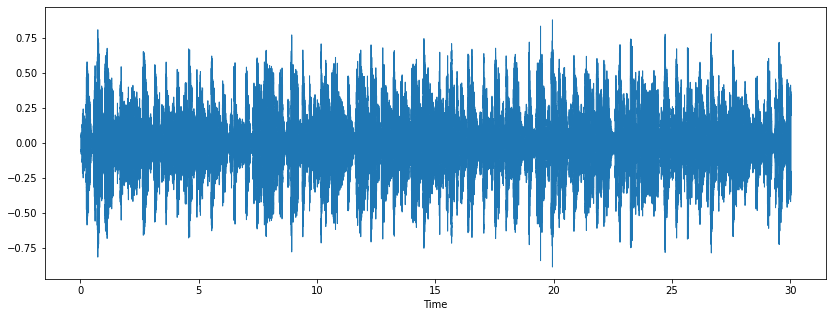

In [6]:
path = 'archive/Data/genres_original/blues/blues.00000.wav'
plt.figure(figsize=(14, 5)) 
x, sr = librosa.load(path) 
librosa.display.waveshow(x, sr=sr) 
print("Blue")

Reggae


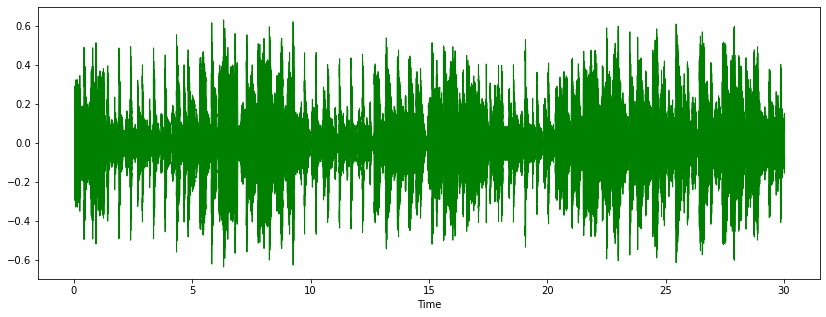

In [7]:
path = 'archive/Data/genres_original/reggae/reggae.00000.wav'
plt.figure(figsize=(14, 5)) 
x, sr = librosa.load(path) 
librosa.display.waveshow(x, sr=sr,color='green')
print("Reggae")

Rock


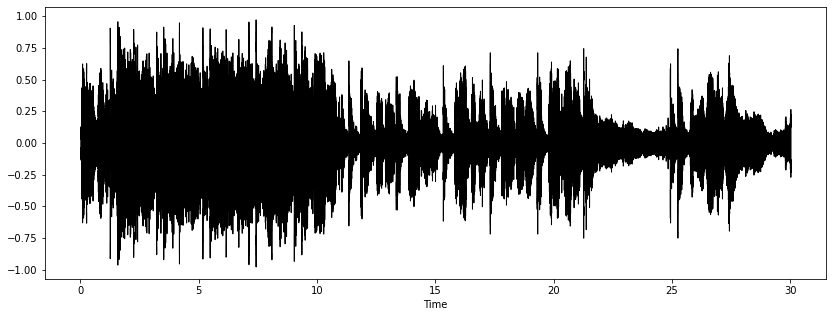

In [8]:
path = 'archive/Data/genres_original/rock/rock.00000.wav'
plt.figure(figsize=(14, 5)) 
x, sr = librosa.load(path) 
librosa.display.waveshow(x, sr=sr,color='black')
print("Rock")

Text(0.5, 1.0, 'Heatmap for mean variables')

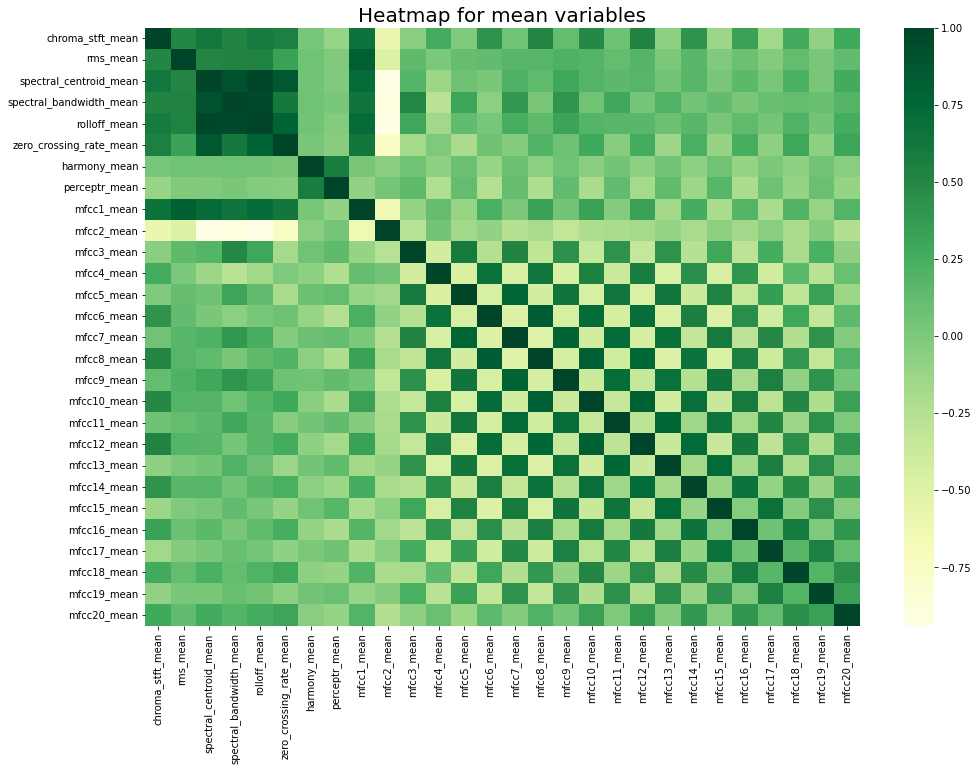

In [9]:
spike = [col for col in df.columns if 'mean' in col] 

f, ax = plt.subplots(figsize=(16, 11)); 
  

sns.heatmap(df[spike].corr(), cmap='YlGn') 
  
plt.title('Heatmap for mean variables', fontsize = 20) 



In [10]:

label_encoder = preprocessing.LabelEncoder() 
df['label'] = label_encoder.fit_transform(df['label'])


In [1]:
X = df.drop(['label','filename'],axis=1) 
y = df['label']

NameError: name 'df' is not defined

### Model Training

In [12]:
cols = X.columns 
minmax = preprocessing.MinMaxScaler() 
np_scaled = minmax.fit_transform(X) 
  
# new data frame with the new scaled data.  
X = pd.DataFrame(np_scaled, columns = cols)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=111) 
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((700, 58), (300, 58), (700,), (300,))

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- KNN

In [14]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=3)

In [15]:
for a,b in zip([lr,dt,knn],["Logistic Regression","Decision Tree","KNN"]):
    a.fit(x_train,y_train)
    prediction=a.predict(x_train)
    y_pred=a.predict(x_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.538571
[Logistic Regression] test data accuracy is : 0.523333
[Decision Tree] training data accuracy is : 0.998571
[Decision Tree] test data accuracy is : 0.620000
[KNN] training data accuracy is : 0.832857
[KNN] test data accuracy is : 0.706667


In [16]:
model_scores={'Logistic Regression':lr.score(x_test,y_test),
             'KNN classifier':knn.score(x_test,y_test),
              'Decision tree':dt.score(x_test,y_test)
             }
model_scores

{'Logistic Regression': 0.5233333333333333,
 'KNN classifier': 0.7066666666666667,
 'Decision tree': 0.62}

In [17]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Decision tree
accuracy,0.523333,0.706667,0.62


<AxesSubplot:>

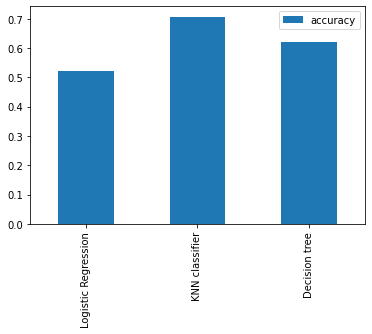

In [18]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

- KNN is giving the best accuracy out of these but is still not that good

In [19]:
  
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0) 
cbc = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass') 
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05) 
  
for clf in (rf, cbc, xgb): 
    clf.fit(x_train, y_train) 
    preds = clf.predict(x_test) 
    print(clf.__class__.__name__,accuracy_score(y_test, preds))

RandomForestClassifier 0.78
CatBoostClassifier 0.8333333333333334
XGBClassifier 0.7733333333333333


          Random Forest  Cat Boost Classifier  XGBC Classifier
accuracy           0.78              0.833333         0.773333


<AxesSubplot:>

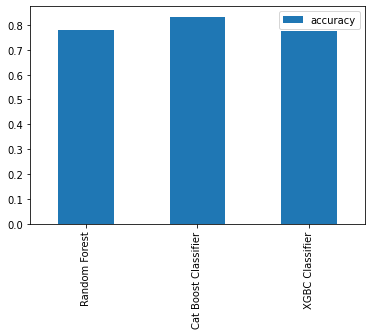

In [31]:
model_scores={'Random Forest':rf.score(x_test,y_test),
             'Cat Boost Classifier':cbc.score(x_test,y_test),
              'XGBC Classifier':xgb.score(x_test,y_test)
             }
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
print(model_compare)
model_compare.T.plot(kind='bar') # (T is here for transpose)

- Cat Boost Classifier gives the best results

- Neural Network

In [20]:
model = Sequential() 
  
model.add(Flatten(input_shape=(58,))) 
model.add(Dense(256, activation='relu')) 
model.add(BatchNormalization()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(10, activation='softmax')) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 58)                0         
                                                                 
 dense (Dense)               (None, 256)               15104     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                        

In [21]:
adam = keras.optimizers.Adam(lr=1e-4) 
model.compile(optimizer=adam, 
             loss="sparse_categorical_crossentropy", 
             metrics=["accuracy"]) 
  
hist = model.fit(x_train, y_train, 
                 validation_data = (x_test,y_test), 
                 epochs = 100, 
                 batch_size = 32)

Epoch 1/100
22/22 [==============================] - 1s 10ms/step - loss: 1.8715 - accuracy: 0.3629 - val_loss: 2.1749 - val_accuracy: 0.2300
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2869 - accuracy: 0.5400 - val_loss: 2.1184 - val_accuracy: 0.2200
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0499 - accuracy: 0.6200 - val_loss: 2.0368 - val_accuracy: 0.3600
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9141 - accuracy: 0.6857 - val_loss: 1.9680 - val_accuracy: 0.3400
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8218 - accuracy: 0.7271 - val_loss: 1.8772 - val_accuracy: 0.5167
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7158 - accuracy: 0.7686 - val_loss: 1.7537 - val_accuracy: 0.6433
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6488 - accuracy: 0.7857 - val_loss: 1.7052 - val_accuracy: 0.5800
Epoch 8/100


In [22]:

test_error, test_accuracy = model.evaluate(x_test, y_test, verbose=1) 
print(f"Test accuracy: {test_accuracy}")

10/10 [==============================] - 0s 2ms/step - loss: 1.2000 - accuracy: 0.7500
Test accuracy: 0.75


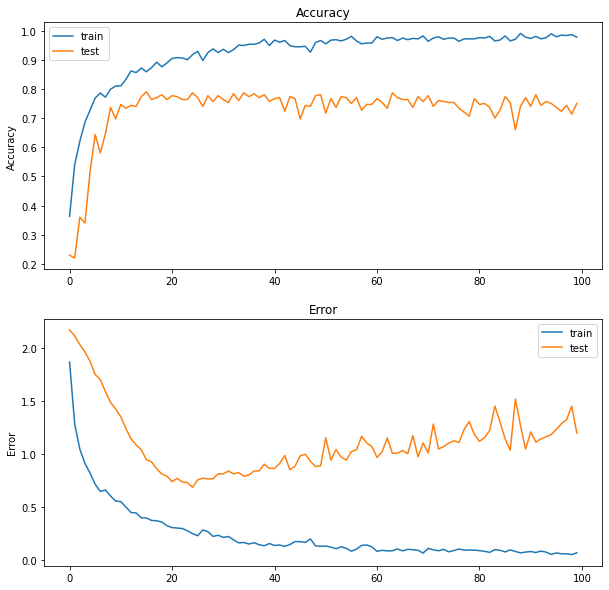

In [23]:
fig, axs = plt.subplots(2,figsize=(10,10)) 
  
# accuracy  
axs[0].plot(hist.history["accuracy"], label="train") 
axs[0].plot(hist.history["val_accuracy"], label="test")     
axs[0].set_ylabel("Accuracy") 
axs[0].legend() 
axs[0].set_title("Accuracy") 
      
# Error  
axs[1].plot(hist.history["loss"], label="train") 
axs[1].plot(hist.history["val_loss"], label="test")     
axs[1].set_ylabel("Error") 
axs[1].legend() 
axs[1].set_title("Error") 
      
plt.show()

- since cat boost classfier gave us the best accuracy we are going to test using that model

In [38]:

save_model = pkl.dumps(cbc)
cbcr_pkl = pkl.loads(save_model)


predictions =cbc.predict(x_test)
true_labels = y_test 

accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


report = classification_report(true_labels, predictions)
print("Classification Report:\n", report)

Accuracy: 83.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.91      0.91      0.91        32
           2       0.85      0.81      0.83        27
           3       0.83      0.83      0.83        30
           4       0.83      0.83      0.83        24
           5       0.77      0.79      0.78        29
           6       0.89      0.86      0.88        29
           7       0.97      0.94      0.96        36
           8       0.77      0.84      0.81        32
           9       0.70      0.68      0.69        31

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



#### Prediction

In [39]:
save_model=pkl.dumps(cbc)
cbc_pkl=pkl.loads(save_model)
cbc_pkl.predict(x_test)


array([[1],
       [1],
       [2],
       [0],
       [0],
       [5],
       [8],
       [8],
       [1],
       [9],
       [3],
       [7],
       [7],
       [9],
       [8],
       [0],
       [0],
       [6],
       [6],
       [1],
       [4],
       [6],
       [3],
       [3],
       [8],
       [7],
       [8],
       [7],
       [6],
       [0],
       [7],
       [8],
       [8],
       [4],
       [7],
       [9],
       [3],
       [9],
       [6],
       [4],
       [0],
       [6],
       [4],
       [0],
       [8],
       [7],
       [0],
       [4],
       [8],
       [5],
       [3],
       [4],
       [7],
       [9],
       [3],
       [6],
       [4],
       [8],
       [9],
       [7],
       [9],
       [9],
       [1],
       [8],
       [0],
       [5],
       [9],
       [8],
       [7],
       [5],
       [8],
       [0],
       [3],
       [1],
       [7],
       [6],
       [6],
       [8],
       [3],
       [3],
       [9],
       [7],
       [3],
    